# supplemental Figure 5 metapredict V3 manuscript 2024

In [1]:
import os
import metapredict as meta
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_recall_curve
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'
# set fonts
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

# set colors for plots here. Colors are for V1, v2, and v3. Chosen because Ryan can differentiate them.
v1color='#FF9D33'
v2color='#FF6433'
v3color='#CC2D46'
hybridcolor='black'
pLDDT_color='blue'


In [2]:
'''
# only run if you need to, this takes a long time. Like a really long time. Especially without batch enabled.
# This gets the speed for running these predictions locally. It's probably overkill to do 500,000 sequences tbh. 

# set random seeds
random_seeds=[3928, 5940, 1234]

# set values.
num_seqs=500000
max_seq_len=500
reps=3

# versions to run
versions=['v1', 'v2', 'v3']

# dict to hold output
performance_values={'v1':[], 'v2':[],'v3':[]}
for vnum, v in enumerate(versions):
    for i in range(0, reps):
        random.seed(random_seeds[i])
        cur_performance_vals=performance_values[f'v{vnum+1}']
        cur_performance_vals.append(meta.print_performance(seq_len=max_seq_len, num_seqs=num_seqs, variable_length=True, version=f'v{vnum+1}'))
        performance_values[f'v{vnum+1}']=cur_performance_vals
print(performance_values)
'''
# for 'no_batch' versions, sequences were predicted individually. Still did 500000, it took a while. 
# Ryans desktop = Intel(R) Core(TM) i9-10920X CPU @ 3.50GHz
performance_intel_i9={'v1': [417716.2521513522, 418482.48135002225, 418876.5037601529], 'v2': [199116.0715670943, 198972.84685870164, 198579.8094798466], 'v3': [219520.3016072599, 219576.30317941614, 219323.57894046744]}
# Ryans desktop, CPU speeds, batching=False
performance_intel_i9_no_batch={'v1': [120558.68426553054, 120316.57359534071, 119658.34496263678], 'v2': [63241.52988520017, 63551.51648931966, 63381.37310570493], 'v3': [40895.744660795295, 39705.92016774037, 39529.904488127744]}

# Ryans desktop = Nvidia A4500
performance_gpu = {'v1': [1617347.2004914235, 1609052.3579288842, 1618398.0883703318], 'v2': [1083080.9693254635, 1082978.236070361, 1081386.9556295073], 'v3': [2997826.2826389573, 2968294.477554175, 2942094.2699250714]}
# Ryans desktop = Nvidia A4500, btaching=False\ 
performance_gpu_no_batch={'v1': [409175.09078829736, 402572.76595068537, 403006.43931095325], 'v2': [277748.29483213986, 279432.43603181816, 280686.3272867651], 'v3': [257472.0347655709, 258150.75713776326, 258407.9542341012]}


# pipeline was bascially protfasta.read_fasta(human_proteome.fasta), start timer, predict disorder, end timer.
# these are values for predicting the entire proteome. 
# Ryans desktop = Intel(R) Core(TM) i9-10920X CPU @ 3.50GHz
proteome_performance_intel_i9={'v1': [24.554914236068726,24.611504793167114,24.529081106185913], 'v2': [52.8881561756134,52.87393069267273,52.88277316093445], 'v3': [56.746856689453125,57.01214289665222,56.64704132080078]}
# Ryans desktop, CPU speeds, batching=False
proteome_performance_intel_i9_no_batch={'v1': [94.5154538154602,94.99924540519714,94.8813362121582], 'v2': [168.73165464401245,168.64276242256165,168.71402382850647], 'v3': [228.79201984405518,228.7362184524536,230.22231125831604]}

# Ryans desktop = Nvidia A4500
proteome_performance_gpu = {'v1': [6.694020986557007,6.4655046463012695,6.457049131393433], 'v2': [10.020249843597412,10.089894771575928,10.097319841384888], 'v3': [4.074631929397583,4.1087486743927,4.0143585205078125]}
# Ryans desktop = Nvidia A4500, btaching=False\
proteome_performance_gpu_no_batch={'v1': [22.36867642402649,22.30877184867859,22.319865942001343], 'v2': [34.97630167007446,34.64274764060974,34.71692752838135], 'v3': [38.13876962661743,37.39431715011597,37.399399518966675]}



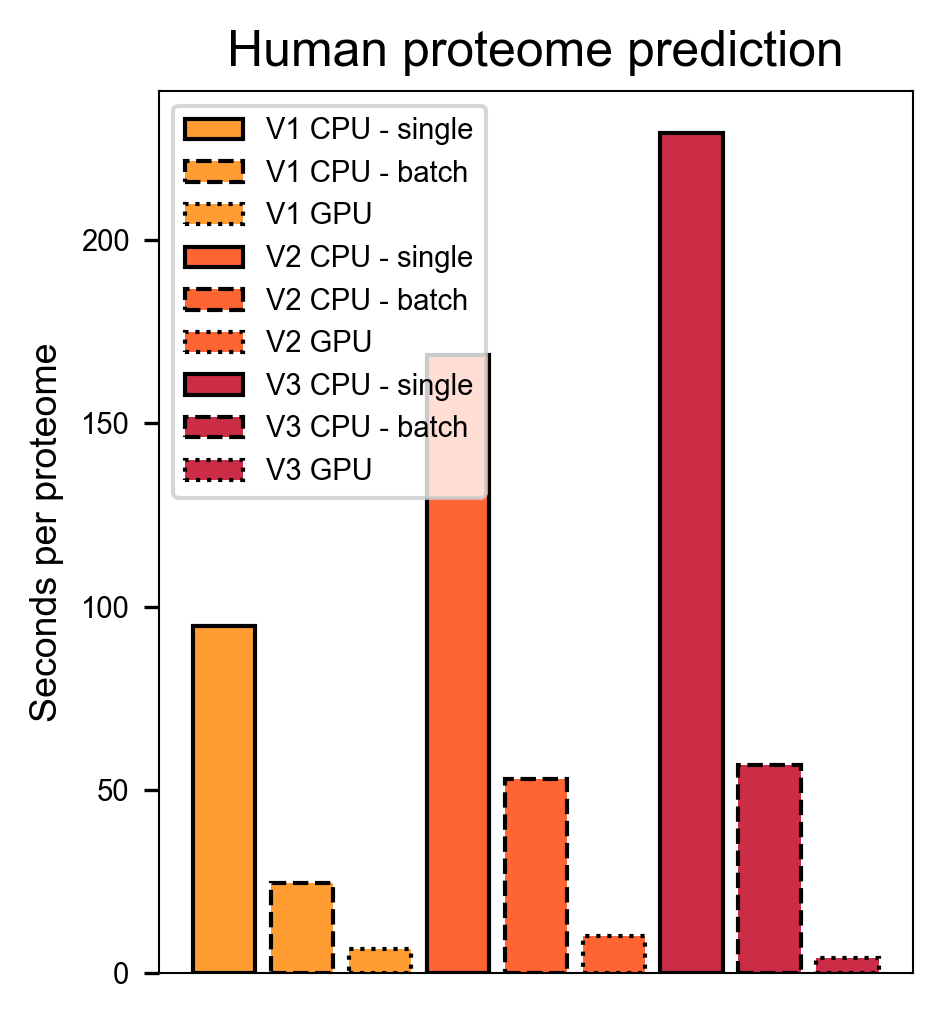

In [10]:

# get average values
average_gpu_proteome=[]
average_intel_no_batch_proteome=[]
average_intel_batch_proteome=[]
versions=['v1','v2','v3']
for i in versions:
    average_gpu_proteome.append(sum(proteome_performance_gpu[i])/len(proteome_performance_gpu[i]))
    average_intel_no_batch_proteome.append(sum(proteome_performance_intel_i9_no_batch[i])/len(proteome_performance_intel_i9_no_batch[i]))
    average_intel_batch_proteome.append(sum(proteome_performance_intel_i9[i])/len(proteome_performance_intel_i9[i]))

# Figure CPU v GPU
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.25, 3.5), dpi=150, facecolor='w', edgecolor='k')

# plot some bars
ax.bar('V1 CPU - single',average_intel_no_batch_proteome[0], color=v1color, edgecolor='black', label='V1 CPU - single')
ax.bar('V1 CPU - batch',average_intel_batch_proteome[0], color=v1color, edgecolor='black', label='V1 CPU - batch', linestyle='dashed')
ax.bar('V1 GPU',average_gpu_proteome[0], color=v1color, edgecolor='black', label='V1 GPU', linestyle=':')
# plot some bars
ax.bar('V2 CPU - single',average_intel_no_batch_proteome[1], color=v2color, edgecolor='black', label='V2 CPU - single')
ax.bar('V2 CPU - batch',average_intel_batch_proteome[1], color=v2color, edgecolor='black', label='V2 CPU - batch', linestyle='dashed')
ax.bar('V2 GPU',average_gpu_proteome[1], color=v2color, edgecolor='black', label='V2 GPU', linestyle=':')
# plot some bars
ax.bar('V3 CPU - single',average_intel_no_batch_proteome[2], color=v3color, edgecolor='black', label='V3 CPU - single')
ax.bar('V3 CPU - batch',average_intel_batch_proteome[2], color=v3color, edgecolor='black', label='V3 CPU - batch', linestyle='dashed')
ax.bar('V3 GPU',average_gpu_proteome[2], color=v3color, edgecolor='black', label='V3 GPU', linestyle=':')

#ax.set_xticks([])
ax.set_xticks([])
#ax.set_yticklabels([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000])

#plt.xticks(np.arange(0,len(n1)), n1, fontsize=8, rotation=70)
ax.set_ylabel('Seconds per proteome',fontsize=9)
ax.legend(loc='upper left', fontsize=7)

# set title
plt.title('Human proteome prediction')

# change the fontsize
ax.tick_params(axis='y', labelsize=7)
#ax.set_title('Comparing Speed Across Networks', fontsize=9)
plt.tight_layout()
plt.savefig('supplemental_fig_5_A.pdf')


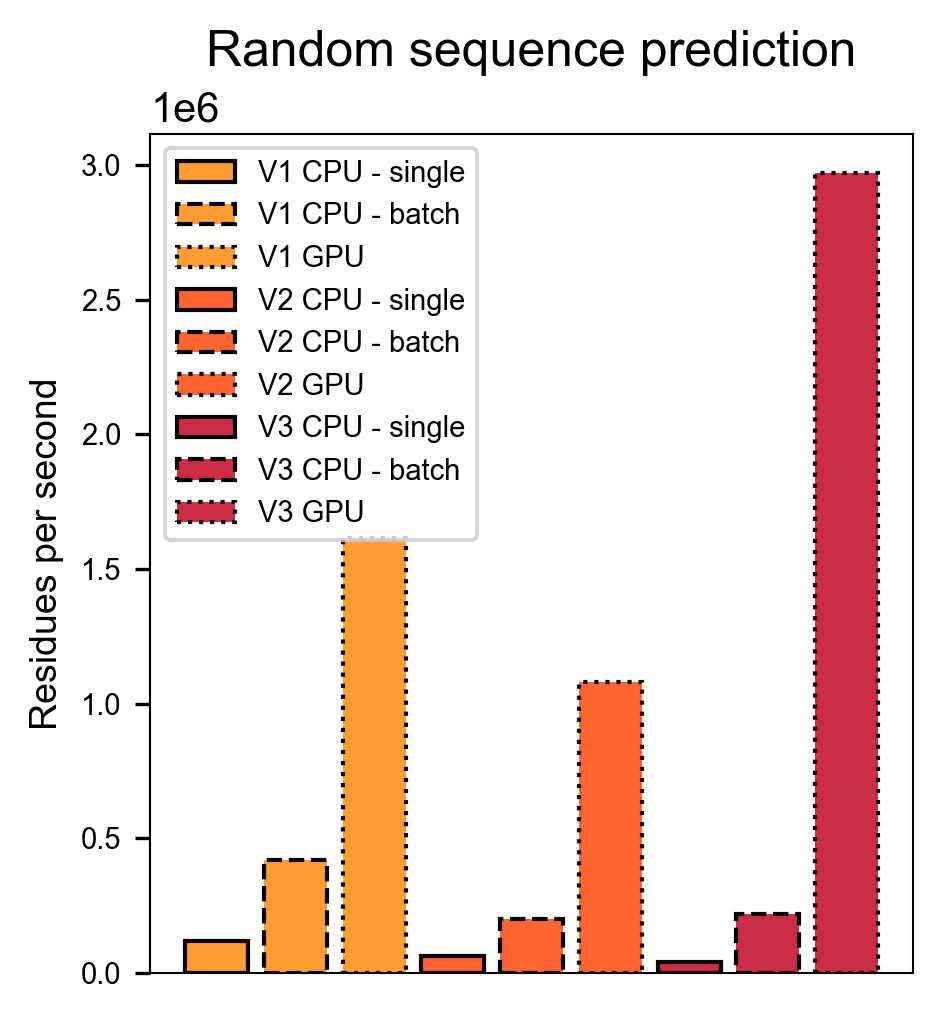

In [9]:

# get average values
average_gpu=[]
average_intel_no_batch=[]
average_intel_batch=[]
versions=['v1','v2','v3']
for i in versions:
    average_gpu.append(sum(performance_gpu[i])/len(performance_gpu[i]))
    average_intel_no_batch.append(sum(performance_intel_i9_no_batch[i])/len(performance_intel_i9_no_batch[i]))
    average_intel_batch.append(sum(performance_intel_i9[i])/len(performance_intel_i9[i]))

# Figure CPU v GPU
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.25, 3.5), dpi=150, facecolor='w', edgecolor='k')

# plot some bars
ax.bar('V1 CPU - single',average_intel_no_batch[0], color=v1color, edgecolor='black', label='V1 CPU - single')
ax.bar('V1 CPU - batch',average_intel_batch[0], color=v1color, edgecolor='black', label='V1 CPU - batch', linestyle='dashed')
ax.bar('V1 GPU',average_gpu[0], color=v1color, edgecolor='black', label='V1 GPU', linestyle=':')
# plot some bars
ax.bar('V2 CPU - single',average_intel_no_batch[1], color=v2color, edgecolor='black', label='V2 CPU - single')
ax.bar('V2 CPU - batch',average_intel_batch[1], color=v2color, edgecolor='black', label='V2 CPU - batch', linestyle='dashed')
ax.bar('V2 GPU',average_gpu[1], color=v2color, edgecolor='black', label='V2 GPU', linestyle=':')
# plot some bars
ax.bar('V3 CPU - single',average_intel_no_batch[2], color=v3color, edgecolor='black', label='V3 CPU - single')
ax.bar('V3 CPU - batch',average_intel_batch[2], color=v3color, edgecolor='black', label='V3 CPU - batch', linestyle='dashed')
ax.bar('V3 GPU',average_gpu[2], color=v3color, edgecolor='black', label='V3 GPU', linestyle=':')

#ax.set_xticks([])
ax.set_xticks([])
# uncomment this to get values, will result in a warning which is annoying. 
#ax.set_yticklabels([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000])

#plt.xticks(np.arange(0,len(n1)), n1, fontsize=8, rotation=70)
ax.set_ylabel('Residues per second',fontsize=9)
ax.legend(loc='upper left', fontsize=7)

# change the fontsize
ax.tick_params(axis='y', labelsize=7)
plt.title('Random sequence prediction')
#ax.set_title('Comparing Speed Across Networks', fontsize=9)
plt.tight_layout()
plt.savefig('supplemental_fig_5_B.pdf')
